In [1]:
from contractions import contractions_dict

In [2]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [3]:
def expand_contractions(text, contraction_map=None):
    if contraction_map is None:
        contraction_map = contractions_dict

    # Using regex for getting all contracted words
    contractions_keys = '|'.join(re.escape(key) for key in contraction_map.keys())
    contractions_pattern = re.compile(f'({contractions_keys})', flags=re.DOTALL)

    expanded_text = contractions_pattern.sub(lambda match: contraction_map.get(match.group(0), match.group(0)), text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

# Example usage
expand_contractions("y'all can't expand contractions i'd think")


'you all cannot expand contractions id think'

In [4]:
entertainment = pd.read_csv('data/BBCNewsSummaryCSV/entertainment_data.csv') 
sport = pd.read_csv('data/BBCNewsSummaryCSV/sport_data.csv')
tech = pd.read_csv('data/BBCNewsSummaryCSV/tech_data.csv')

In [5]:
print(entertainment.head())

            filename                                        newsarticle  \
0  entertainment_001  Gallery unveils interactive tree\n\nA Christma...   
1  entertainment_002  Jarre joins fairytale celebration\n\nFrench mu...   
2  entertainment_003  Musical treatment for Capra film\n\nThe classi...   
3  entertainment_004  Richard and Judy choose top books\n\nThe 10 au...   
4  entertainment_005  Poppins musical gets flying start\n\nThe stage...   

                                             summary  
0  The messages will be "unwrapped" by sculptor R...  
1  Bloom is to be formally presented with the Han...  
2  The classic film It's A Wonderful Life is to b...  
3  "It was very hard to follow last year's extrem...  
4  Mary Poppins was originally created by author ...  


In [6]:
training_dataset = pd.concat([entertainment,sport,tech], ignore_index=True)

In [7]:
training_dataset = training_dataset.sample(frac=1).reset_index(drop=True)

In [8]:
training_dataset.head()

,filename,newsarticle,summary
0,sport_375,Dallaglio his own man to the end\n\nControvers...,"To supporters of England, Dallaglio could do n..."
1,entertainment_058,Berlin hails European cinema\n\nOrganisers say...,Festival director Dieter Kosslick says this st...
2,sport_087,GB quartet get cross country call\n\nFour Brit...,Yelling clinched the women's European cross co...
3,sport_150,Jol joy at 'professional' Cup win\n\nTottenham...,"""If you play like we did and concede two goals..."
4,sport_506,Rusedski forced out in Marseille\n\nGreg Rused...,Greg Rusedski was forced to withdraw from the ...


In [9]:
def getSenLen(sentence):
    return len(sentence.split())

In [10]:
training_dataset['article_length'] = training_dataset['newsarticle'].apply(getSenLen)
training_dataset['summary_length'] = training_dataset['summary'].apply(getSenLen)

In [18]:
training_dataset

,filename,newsarticle,summary,article_length,summary_length
0,sport_375,Dallaglio his own man to the end\n\nControvers...,"To supporters of England, Dallaglio could do n...",745,305
1,entertainment_058,Berlin hails European cinema\n\nOrganisers say...,Festival director Dieter Kosslick says this st...,226,97
2,sport_087,GB quartet get cross country call\n\nFour Brit...,Yelling clinched the women's European cross co...,184,76
3,sport_150,Jol joy at 'professional' Cup win\n\nTottenham...,"""If you play like we did and concede two goals...",311,131
4,sport_506,Rusedski forced out in Marseille\n\nGreg Rused...,Greg Rusedski was forced to withdraw from the ...,130,52
...,...,...,...,...,...
1293,sport_115,Giggs handed Wales leading role\n\nRyan Giggs ...,"""For this particular game I think it is approp...",648,302
1294,entertainment_084,Oscar nominees gear up for lunch\n\nLeonardo D...,Oscar nominees Swank and Foxx were among the w...,220,86
1295,tech_043,DVD copy protection strengthened\n\nDVDs will ...,Macrovision says its new RipGuard technology w...,341,128
1296,entertainment_017,Spark heads world Booker list\n\nDame Muriel S...,Dame Muriel Spark is among three British autho...,252,124


In [12]:
training_dataset.describe()

,article_length,summary_length
count,1298.000000,1298.000000
mean,383.246533,165.270416
std,241.582739,109.734916
min,114.000000,42.000000
25%,234.000000,99.250000
50%,321.000000,137.000000
75%,464.000000,202.750000
max,3482.000000,1706.000000


Text(0.5, 1.0, 'Boxplot of Summary Lengths')

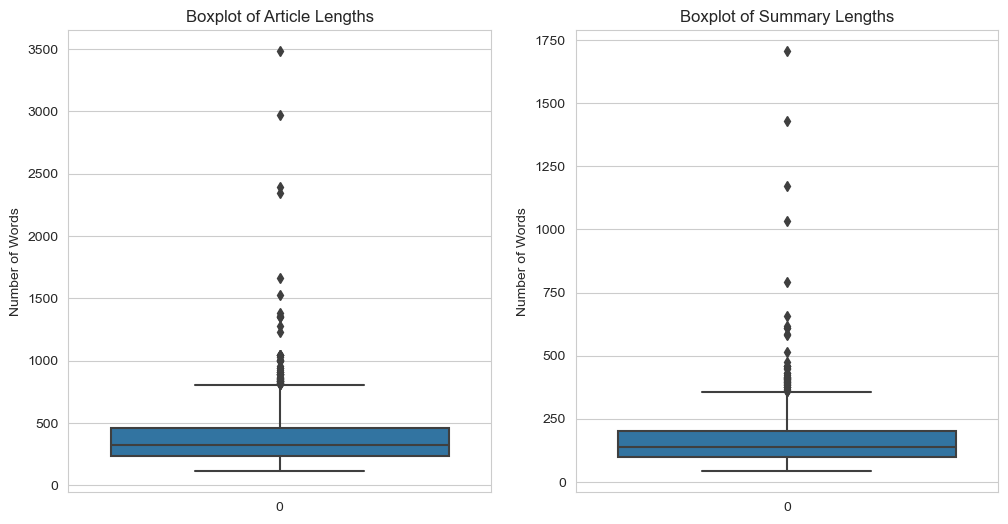

In [13]:
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot for the articles' number of words
sns.boxplot(training_dataset["article_length"], ax=axes[0])
axes[0].set_ylabel("Number of Words")
axes[0].set_title("Boxplot of Article Lengths")

# Plot for the summaries' number of words
sns.boxplot(training_dataset["summary_length"], ax=axes[1])
axes[1].set_ylabel("Number of Words")
axes[1].set_title("Boxplot of Summary Lengths")


In [14]:
# Get statistics for the articles boxplot
lines_articles = axes[0].lines[:6]
articles_stats = [line.get_ydata()[0] for line in lines_articles]
Q1_articles, Q3_articles, lower_whisker_articles, upper_whisker_articles, median_articles = articles_stats[:5]

# Get statistics for the summaries boxplot
lines_summaries = axes[1].lines[:6]
summaries_stats = [line.get_ydata()[0] for line in lines_summaries]
Q1_summaries, Q3_summaries, lower_whisker_summaries, upper_whisker_summaries, median_summaries = summaries_stats[:5]

In [19]:
training_dataset = training_dataset[(training_dataset['summary_length'] <= upper_whisker_summaries) & (training_dataset['article_length'] <= upper_whisker_articles)]

In [21]:
training_dataset.head()

,filename,newsarticle,summary,article_length,summary_length
0,sport_375,Dallaglio his own man to the end\n\nControvers...,"To supporters of England, Dallaglio could do n...",745,305
1,entertainment_058,Berlin hails European cinema\n\nOrganisers say...,Festival director Dieter Kosslick says this st...,226,97
2,sport_087,GB quartet get cross country call\n\nFour Brit...,Yelling clinched the women's European cross co...,184,76
3,sport_150,Jol joy at 'professional' Cup win\n\nTottenham...,"""If you play like we did and concede two goals...",311,131
4,sport_506,Rusedski forced out in Marseille\n\nGreg Rused...,Greg Rusedski was forced to withdraw from the ...,130,52


In [27]:


train_df, test_df = train_test_split(training_dataset, test_size=0.2, random_state=42)


In [28]:
train_df

,filename,newsarticle,summary,article_length,summary_length
33,entertainment_144,Eminem beats Elvis to number one\n\nRapper Emi...,"Last week's number one, Elvis's It's Now or Ne...",196,90
1055,entertainment_329,Van Gogh festival film withdrawn\n\nMurdered d...,Murdered director Theo van Gogh's controversia...,241,104
965,entertainment_383,French honour for director Parker\n\nBritish f...,"""You have explored the possibilities of film w...",225,87
705,entertainment_193,CSI shows give 'unrealistic view'\n\nPeople ha...,"""The CSI effect is basically the perception of...",471,222
894,tech_224,Disney backs Sony DVD technology\n\nA next gen...,Film giant Disney says it will produce its fut...,321,152
...,...,...,...,...,...
1094,entertainment_330,Douglas set for Indian adventure\n\nActor Mich...,Actor Michael Douglas is to co-produce and sta...,227,96
1147,sport_325,"Worcester v Sale (Fri)\n\nSixways\n\nFriday, 2...",John Payne and Chris Rhys Jones come into the ...,115,47
1183,entertainment_214,Volcano drama erupts on BBC One\n\nSupervolcan...,"Also on Christmas Day, John Nettles will retur...",471,207
903,sport_501,Ivanovic seals Canberra victory\n\nSerbia's An...,Serbia's Ana Ivanovic captured her first WTA t...,130,73
